In [1]:
import pandas as pd

# Path to your downloaded excel from Wyscout
excel_file_path = '/Users/marclambertes/Downloads/Total/Eredivisie - 2023-2024.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# List of metrics you want to keep
metrics_to_keep = ['Player','Team', 'Position', 'Age', 'Matches played', 'Minutes played','Goals per 90', 'xG per 90', 'Shots on target, %', 'Dribbles per 90', 'Progressive runs per 90',
                  'Defensive duels won, %', 'Aerial duels won, %', 'PAdj Sliding tackles', 'PAdj Interceptions', 'Shots blocked per 90',
                  'xA per 90', 'Key passes per 90', 'Passes to final third per 90', 'Passes to penalty area per 90', 'Through passes per 90', 'Progressive passes per 90']

filtered_df = df[metrics_to_keep]

filtered_df.rename(columns={
    'Goals per 90': 'Goals',
    'xG per 90': 'xG',
    'Dribbles per 90': 'Dribbles',
    'Progressive runs per 90': 'Prog. runs',
    'Defensive duels won, %': 'Def. duels%',
    'Aerial duels won, %': 'Aerial duels %',
    'PAdj Sliding tackles': 'PAdj tackles',
    'Shots blocked per 90': 'Shots blocked',
    'xA per 90': 'xA',
    'Key passes per 90': 'Key passes',
    'Passes to final third per 90': 'Passes final 3rd',
    'Passes to penalty area per 90': 'Passes to box',
    'Through passes per 90': 'Through pass',
    'Progressive passes per 90': 'Prog. passes'
                           }, inplace=True)


# Type the desired name for the new Excel file
output_excel_file = '/Users/marclambertes/Downloads/NEW.xlsx'

# Save the filtered DataFrame to a new Excel file
filtered_df.to_excel(output_excel_file, index=False)

print(f"Filtered DataFrame saved to {output_excel_file}")


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_77030/3804319242.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={


Filtered DataFrame saved to /Users/marclambertes/Downloads/NEW.xlsx


[50, 50, 'B. Brobbey', 0.68, 0.63, 57.69, 3.84, 1.71, 64.0, 48.65, 0.0, 2.05, 0.16, 0.22, 0.93, 0.57, 0.52, 0.0, 0.31]
16
19 None
16
16 None


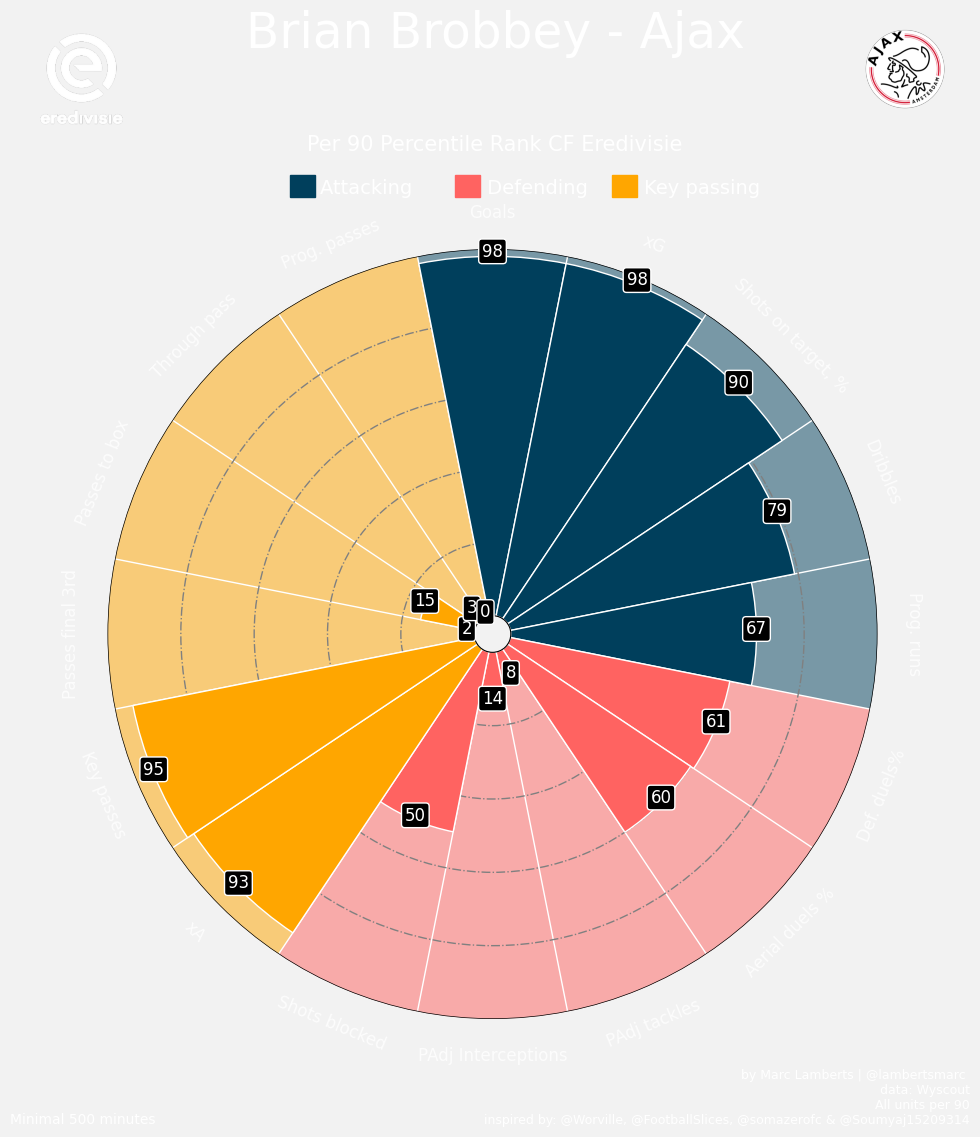

In [3]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

#import newly made excel. .
df = pd.read_excel('/Users/marclambertes/Downloads/NEW.xlsx')
df = df[df['Minutes played'] >= 500]
positions_to_filter = ['CF']
filtered_df = df[df['Position'].isin(positions_to_filter)]

df = df.drop(['Team', 'Position', 'Age', 'Matches played', 'Minutes played',],axis=1).reset_index()

#Create a parameter list
params = list(df.columns)
params

params = params[2:]
params

player = df.loc[df['Player']=='B. Brobbey'].reset_index()
player = list(player.loc[0])
print(player)

df.Player.values

# the length of our players in longer than the length of the params. we need to drop the first 3 player list items
print(len(player),print(len(params)))
player = player[3:]
print(len(player),print(len(params)))

values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))
    
round(stats.percentileofscore(df[params[0]],player[0]))

for n,i in enumerate(values):
    if i == 100:
        values[n] = 99
        
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="white",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# color for the slices and tex
slice_colors = ["#003f5c"] * 5 + ["#ff6361"] * 5     + ["#ffa600"] * 6
#slice_colors = ["#008000"] * 4 + ["#FF9300"] * 7     + ["#D70232"] * 5

text_colors = ["#000000"] * 8 + ["white"] * 5

logo_image = plt.imread('/Users/marclambertes/Downloads/Images/Eredivisie.png')  # replace 'path/to/your/logo.png' with the actual path to your logo image


# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,# where the parameters will be added
    color_blank_space="same",
    slice_colors=slice_colors,
    kwargs_slices=dict( 
        edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="white", fontsize=12,
        va="center", alpha=.8
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="white", facecolor="#000000",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)
add_image(logo_image, fig, left=0.001, bottom=1, width=0.2, height=0.1, zorder=15)

# Add second logo
logo_image_2 = plt.imread('/Users/marclambertes/Downloads/Images/Ajax.png')  # Replace with the path to your second logo image
add_image(logo_image_2, fig, left=0.85, bottom=1.02, width=0.15, height=0.08, zorder=15)


# add title
fig.text(
    0.515, 0.97, "Brian Brobbey - Ajax\n\n", size=35,
    ha="center", color="white"
)

# add subtitle
fig.text(
    0.515, 0.932,
    #"Per 90 Percentile Rank defenders WSL 22/23-\n\n",
    "Per 90 Percentile Rank CF Eredivisie\n\n",
    size=15,
    ha="center", color="white"
)

fig.text(
    0.03, 0.005, f"Minimal 500 minutes", color="white")

# add credits
notes = '@lambertsmarc'
CREDIT_1 = "by Marc Lamberts | @lambertsmarc \ndata: Wyscout\nAll units per 90"
CREDIT_2 = '@lambertsmarc'
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"


fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="white",
    ha="right"
)


# add text
fig.text(
    0.34, 0.935, "Attacking            Defending         Key passing                ", size=14,color="white"
    #0.34, 0.935, "Defending       Attacking       Passing                ", size=14,color="white"

)

 #add rectangles
fig.patches.extend([
    plt.Rectangle(
       (0.31, 0.9325), 0.025, 0.021, fill=True, color="#003f5c",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.475, 0.9325), 0.025, 0.021, fill=True, color="#ff6361",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9325), 0.025, 0.021, fill=True, color="#ffa600",
        transform=fig.transFigure, figure=fig
    ),
])


plt.savefig('B. Brobbey.png',dpi=750,bbox_inches = 'tight', facecolor='#051650')
